In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mode
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, confusion_matrix, r2_score, recall_score, precision_score

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/steven1946/Machine-Learning/main/UAS/knn_datasets.csv')

In [ ]:
df.head()

,X1,X2,X5,X6,X7,X9
0,3,126,235,39.3,0.704,0
1,8,99,0,35.4,0.388,0
2,7,196,0,39.8,0.451,1
3,9,119,0,29.0,0.263,1
4,11,143,146,36.6,0.254,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      480 non-null    int64  
 1   X2      480 non-null    int64  
 2   X3      479 non-null    float64
 3   X4      480 non-null    int64  
 4   X5      480 non-null    int64  
 5   X6      480 non-null    float64
 6   X7      480 non-null    float64
 7   X8      480 non-null    int64  
 8   X9      480 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 33.9 KB


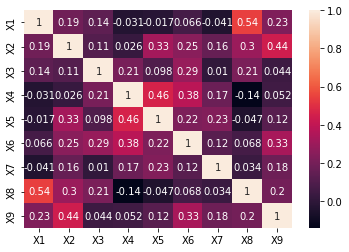

In [ ]:
sns.heatmap(df.corr(), annot=True)

X8, X4 di drop karena dua data itu memiliki korelasi yang kuat dengan dependent variable lainnya
X5, X3 di drop karena korelasi dengan X9 rendah


In [ ]:
df = df.dropna()

In [ ]:
df = df.drop(['X8'], axis=1)
df = df.drop(['X5'], axis=1)
df = df.drop(['X4'], axis=1)
df = df.drop(['X3'], axis=1)
df = df.drop(['X7'], axis=1)
# df = df.drop(['X1'], axis=1)
# df = df.drop(['X6'], axis=1)

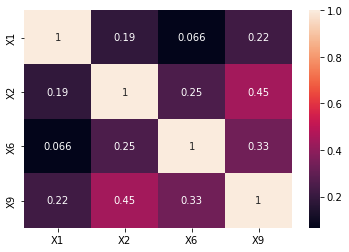

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
y = df[['X9']].values
X = df.drop(['X9'], axis=1).values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 1)

In [ ]:
X_train.shape


(359, 3)

In [ ]:
X_test.shape

(120, 3)

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 217 to 360
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      120 non-null    int64  
 1   X2      120 non-null    int64  
 2   X6      120 non-null    float64
 3   X7      120 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 4.7 KB


In [ ]:
class kNN:
  def __init__(ide, y, measure, mess):
    ide.y = y
    ide.measure = measure
    ide.mess = mess
  def distance_function(ide, a, b, x):
    prop = len(a)
    if x == -1:
      ham_distance = 0
      for i in range(prop):
        if a[i] != b[i]:
          ham_distance += 1
      return ham_distance
    distance = 0
    for i in range(prop):
      distance += abs(a[i] - b[i])**x
    distance = distance**(1/x)
    return distance

  def predict(ide, x_train, x_test, y_train):
    answer = []
    if ide.measure == 'manhattan':
      x = 1
    elif ide.measure == 'euclidian':
      x = 2
    elif ide.measure == 'minkowski':
      x = 3
    else:
      x =- 1
    for test_data in x_test:
      distances = []
      for t in range(len(x_train)):
        distance = ide.distance_function(test_data, x_train[t], x)
        distances.append(distance)
      distances = np.array(distances)
      sort = np.argsort(distances)[:ide.y]
      neighbor = y_train[sort]
      if ide.mess == 'regression':
        prediction = np.mean(neighbor)
      elif ide.mess == 'classification':
        prediction = mode(neighbor)
        prediction = prediction.mode[0]
      answer.append(prediction)
    return answer

In [ ]:
rmse = []
for y in range(1, 50):
  model = kNN(y, 'euclidian', 'classification')
  pred = model.predict(X_train, X_test, y_train)
  rmse.append(np.sqrt(mean_squared_error(y_test, pred)))

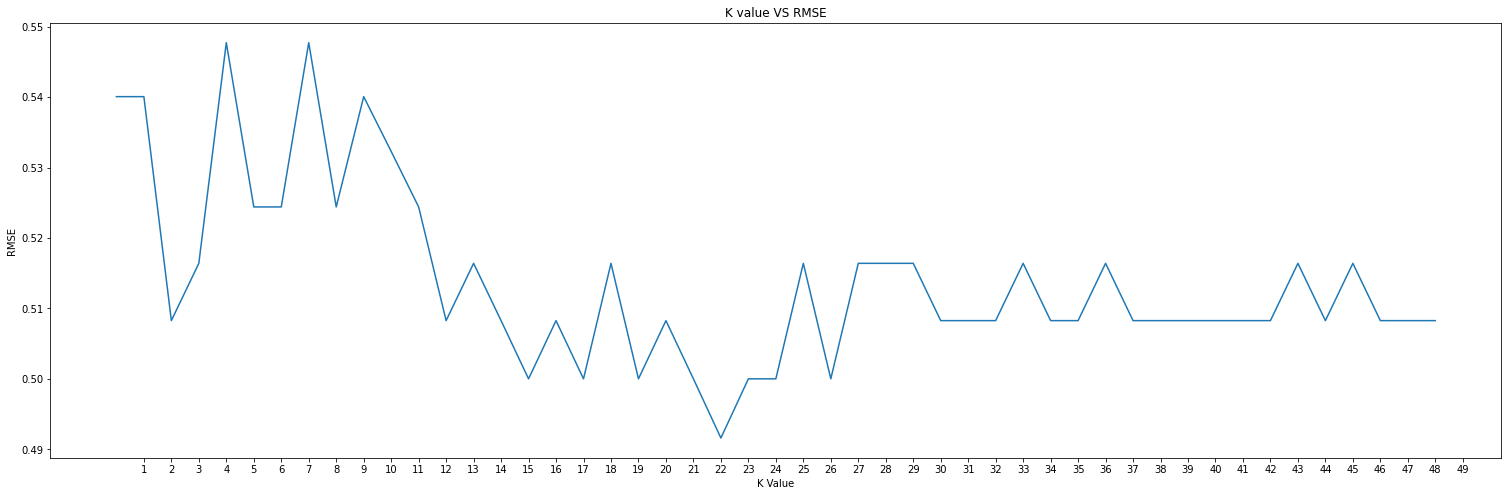

In [ ]:
plt.figure(figsize=(26,8))
plt.plot(rmse)
plt.title('K value VS RMSE')
plt.xticks(np.arange(1,50))
plt.xlabel('K Value')
plt.ylabel('RMSE')
plt.show()

In [ ]:
model = kNN(22, 'euclidian', 'classification')
pred = model.predict(X_train, X_test,y_train)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.82      0.75        80
           1       0.39      0.23      0.29        40

    accuracy                           0.62       120
   macro avg       0.54      0.53      0.52       120
weighted avg       0.58      0.62      0.59       120



In [ ]:
from sklearn.metrics import confusion_matrix
rmse = np.sqrt(mean_squared_error(y_test,pred))
cm = confusion_matrix(y_test,pred)
print(rmse)

0.5


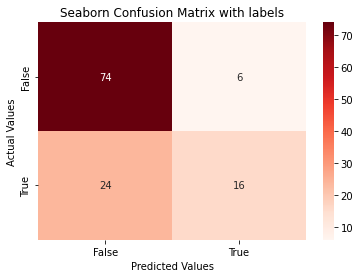

In [ ]:
ax = sns.heatmap(cm, annot=True, cmap='Reds')
# sns.heatmap(cm,annot = True)

ax.set_title('Seaborn Confusion Matrix with labels');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()